In [1]:
from __future__ import print_function
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('crop_recommendation.csv')
df.head(10)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [3]:
df.tail(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2190,103,40,30,27.309018,55.196224,6.348316,141.483164,coffee
2191,118,31,34,27.548230,62.881792,6.123796,181.417081,coffee
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,coffee
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,coffee
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [4]:
df.shape

(2200, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<AxesSubplot:xlabel='count', ylabel='label'>

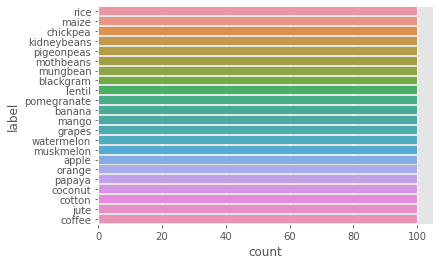

In [45]:
sns.countplot(y = 'label',data = df)

# Data Preprocessing

In [10]:
X =  df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
Y = df['label']
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [11]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [12]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (1760, 7)
X_test shape: (440, 7)
Y_train shape: (1760,)
Y_test shape: (440,)


# Data Modelling

In [13]:
accuracy={}

In [14]:
from sklearn.model_selection import cross_val_score

# Logistic Regression Algorithm 

In [15]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

# K nearest neighbors Algorithm

In [16]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

# Support Vector Classifier Algorithm

In [17]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

# Naive Bayes Algorithm 

In [18]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

# Decision tree Algorithm

In [19]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

# Random forest Algorithm

In [20]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

# Gradient Boosting  Algorithm

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state = 42)
gbc.fit(X_train,Y_train)

GradientBoostingClassifier(random_state=42)

In [22]:
accuracy["Log R"]=logreg.score(X_train, Y_train)
accuracy["knn"]=knn.score(X_train, Y_train)
accuracy["svc"]=svc.score(X_train, Y_train)
accuracy["nb"]=nb.score(X_train, Y_train)
accuracy["dectree"]=dectree.score(X_train, Y_train)
accuracy["ranfor"]=ranfor.score(X_train, Y_train)
accuracy["gbc"]=gbc.score(X_train, Y_train)

In [23]:
accuracy

{'Log R': 0.9693181818181819,
 'knn': 0.9670454545454545,
 'svc': 0.9767045454545454,
 'nb': 0.9954545454545455,
 'dectree': 1.0,
 'ranfor': 0.9994318181818181,
 'gbc': 1.0}

<BarContainer object of 7 artists>

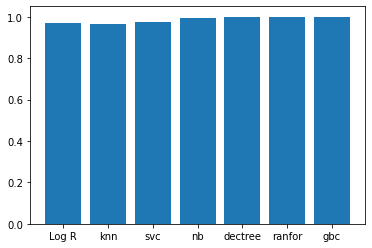

In [24]:
import matplotlib.pyplot as plt
algo=list(accuracy.keys())
accu=list(accuracy.values())
plt.bar(range(len(accuracy)),accu,tick_label=algo)

# Model Evaluation


In [25]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)
Y_pred_gbc = gbc.predict(X_test)

In [26]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)
accuracy_gbc = accuracy_score(Y_test, Y_pred_gbc)

In [27]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc* 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))
print("Gradient Boosting: " + str(accuracy_gbc * 100))

Logistic Regression: 96.81818181818181
K Nearest neighbors: 96.13636363636363
Support Vector Classifier: 97.72727272727273
Naive Bayes: 99.31818181818181
Decision tree: 99.31818181818181
Random Forest: 99.54545454545455
Gradient Boosting: 99.54545454545455


In [28]:
accuracy1={}

In [29]:
accuracy1["Log R"]=accuracy_logreg
accuracy1["knn"]=accuracy_knn
accuracy1["svc"]=accuracy_svc
accuracy1["nb"]=accuracy_nb
accuracy1["dectree"]=accuracy_dectree
accuracy1["ranfor"]=accuracy_ranfor
accuracy1["GB"]=accuracy_gbc

In [30]:
accuracy1

{'Log R': 0.9681818181818181,
 'knn': 0.9613636363636363,
 'svc': 0.9772727272727273,
 'nb': 0.9931818181818182,
 'dectree': 0.9931818181818182,
 'ranfor': 0.9954545454545455,
 'GB': 0.9954545454545455}

<BarContainer object of 7 artists>

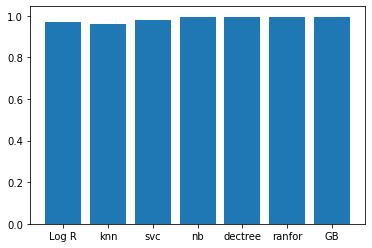

In [31]:
import matplotlib.pyplot as plt
algo=list(accuracy1.keys())
accu=list(accuracy1.values())
plt.bar(range(len(accuracy1)),accu,tick_label=algo)

In [32]:
test = list(accuracy1.values())
print(test)

[0.9681818181818181, 0.9613636363636363, 0.9772727272727273, 0.9931818181818182, 0.9931818181818182, 0.9954545454545455, 0.9954545454545455]


In [33]:
train=list(accuracy.values())
print(train)

[0.9693181818181819, 0.9670454545454545, 0.9767045454545454, 0.9954545454545455, 1.0, 0.9994318181818181, 1.0]


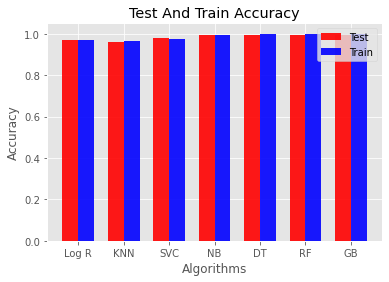

In [34]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
n = 7
test = list(accuracy1.values())
train=list(accuracy.values())
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.35
opacity = 0.9
ax.bar(index, test, bar_width, alpha=opacity, color='r',
                label='Test')
ax.bar(index+bar_width, train, bar_width, alpha=opacity, color='b',
                label='Train')
ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracy')
ax.set_title('Test And Train Accuracy')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Log R','KNN','SVC','NB','DT','RF','GB'
    ))
ax.legend()
plt.show()

# Finding maximum accuracy algorithm


In [37]:
m=max(list(accuracy1.values()))
print("The Algorithm which gives maximum accuracy...")
for i in accuracy1:
      if accuracy1[i]==m:
        print("{} : {}".format(i,accuracy1[i]*100))


The Algorithm which gives maximum accuracy...
ranfor : 99.54545454545455
GB : 99.54545454545455


In [38]:
from tabulate import tabulate

data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9],[104,18, 30, 23.603016, 60.3, 6.7, 140.91],[90,42,43,20.87974371,82.00274423,6.502985292000001,202.9355362],[71,54,16,22.61359953,63.69070564,5.7499144210000015,87.75953857],[28,72,84,18.72963144,19.18197264,6.481783042999999,71.58010169],[24,80,22,16.71170642,19.17651433,5.635993966,96.77285817],[9,76,25,28.88302142,50.12323801,5.70951224,179.2155874],[25,76,17,31.74105409,68.63525428,7.241148507,62.3061735],[12,66,20,27.41434987,63.41785982,7.336117221,44.43177543],[38,14,37,21.80523051,94.63612858,6.658402594,102.6488846],[108,92,53,27.40053601,82.96221306,6.276800323,104.9378],[26,32,32,30.91471455,49.92963856,6.810186079,90.14047759],[4,136,204,29.93707596,81.77713468,5.898944282,65.52279323],[29,8,28,26.87037587,91.72546257,6.100429497,214.4128874],[118,50,19,22.95604064,82.33733678,6.360812227,66.48339303],[9,76,25,28.88302142,50.12323801,5.70951224,179.2155874],[17,57,20,28.50677929,45.20094476,3.793575185,66.1761456],[27,40,24,27.84026517,89.99615558,7.063022095,52.84626009],[106,14,45,24.47018505,84.16390229,6.417011754,57.26773002],[88,17,52,29.90415889,90.75284363,6.646962425,25.37828397],[25,143,198,22.81212536,91.51861705,6.027314401,107.855225],[15,9,11,11.54785707,94.14861001,7.907956251,108.82891709999998]])
actual=['jute','coffee','rice','maize','chickpea','kidneybeans','pigeonpeas','blackgram','lentil','pomegranate','banana','mango','grapes','coconut','cotton','pigeonpeas','mothbeans','mungbean','watermelon','muskmelon','apple','orange']
for i in range(len(data)):
    predRan = ranfor.predict(data)
    predgb = gbc.predict(data)
    prednb = nb.predict(data)
    predknn= knn.predict(data)
    predlog = logreg.predict(data)
    preddt = dectree.predict(data)
    predsvc = svc.predict(data)

output_table = [[actual[i], predRan[i],predgb[i],prednb[i],predknn[i],predlog[i],preddt[i],predsvc[i]] for i in range(len(data))]
print(tabulate(output_table, headers=["Act O/p", "Ran O/p","gb O/p","nb O/p","knn O/p","log O/p","dt O/p","svc O/p"], tablefmt="grid"))

+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
| Act O/p     | Ran O/p     | gb O/p      | nb O/p      | knn O/p     | log O/p     | dt O/p      | svc O/p     |
+=============+=============+=============+=============+=============+=============+=============+=============+
| jute        | jute        | coffee      | jute        | jute        | jute        | coffee      | jute        |
+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
| coffee      | coffee      | coffee      | coffee      | coffee      | coffee      | coffee      | coffee      |
+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
| rice        | rice        | rice        | rice        | jute        | rice        | rice        | jute        |
+-------------+-------------+-------------+-------------+-------------+-------------+---